# Object Segmentation and Tracking with OpenCV




## What is OpenCV?

OpenCV(Open Source Computer Vision Library) is an open source computer vision and machine learning software library. It mainly focuses on image analysis, processing and evaluation.


### Languages and platforms

OpenCV is written natively in C++. It has C++, C, Python, Java and MATLAB interfaces. It supports Windows, Linux, and MacOS w.r.t desktop and it also supports Android, IOS, and Blackberry w.r.t mobile.

### Why OpenCV?

1. made for image processing
2. Speedy  
3. Efficient

### Install OpenCV
__[download from OpenCV website](http://opencv.org/releases.html)__


## Object Segmentation

### The Watershed Transformation

Any grayscale image can be viewed as a topographic surface where high intensity denotes peaks and hills while low intensity denotes valleys.

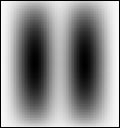

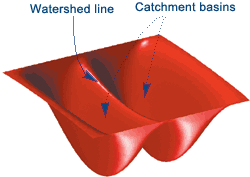


__[CMM website on Watershed](http://cmm.ensmp.fr/~beucher/wtshed.html)__



### Example in OpenCV:
#### Image Segmentation with Distance Transform and Watershed Algorithm

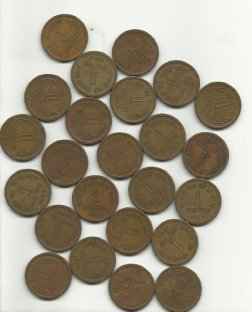


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

The result will be:

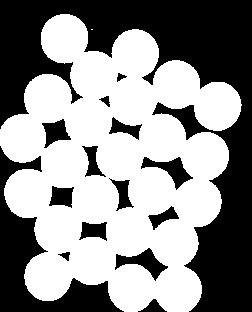

But noises...

What we know for sure:
1. Region near to center of objects are foreground 
2. Region much away from the object are background

What we are not sure:
1. The boundary region of coins

Extract region that we are sure they are coins and region that we are sure they are background

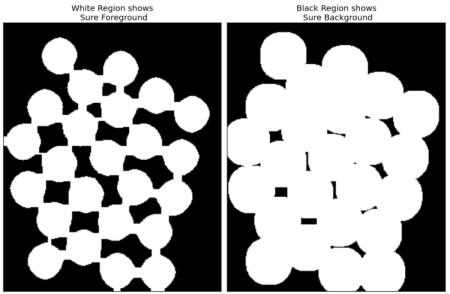

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [ ]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

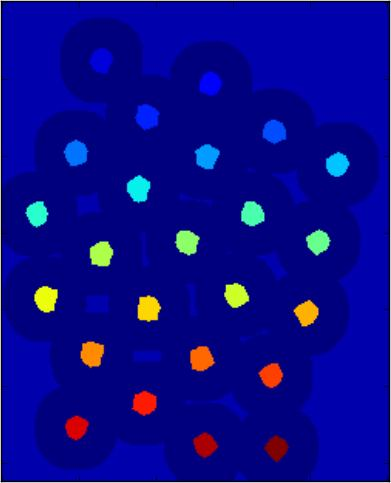

In [ ]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

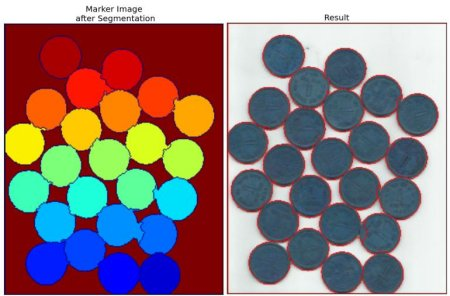

### Object Detection with Cascade Classifiers

Viola–Jones object detection framework:
1. Robust
2. Real-time
3. Face detection (not recognition)


The algorithm has four stages:
1. Haar Feature Selection
2. Creating an Integral Image
3. Adaboost Training
4. Cascading Classifiers

Haar Features:
All human faces share some similar properties. These regularities may be matched using Haar Features.

A few properties common to human faces:
The eye region is darker than the upper-cheeks.
The nose bridge region is brighter than the eyes.
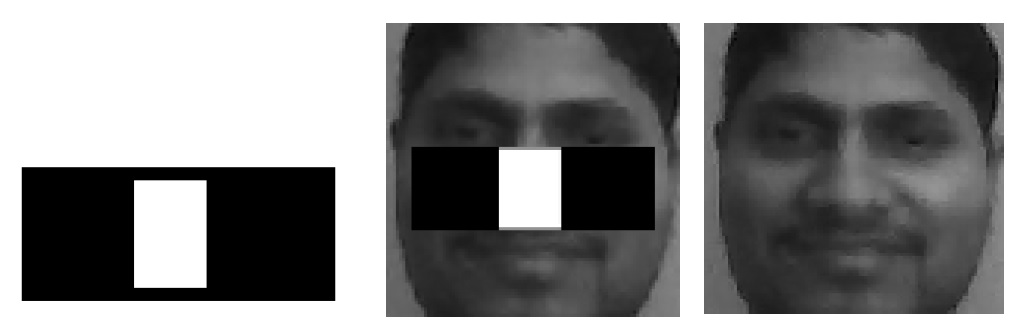
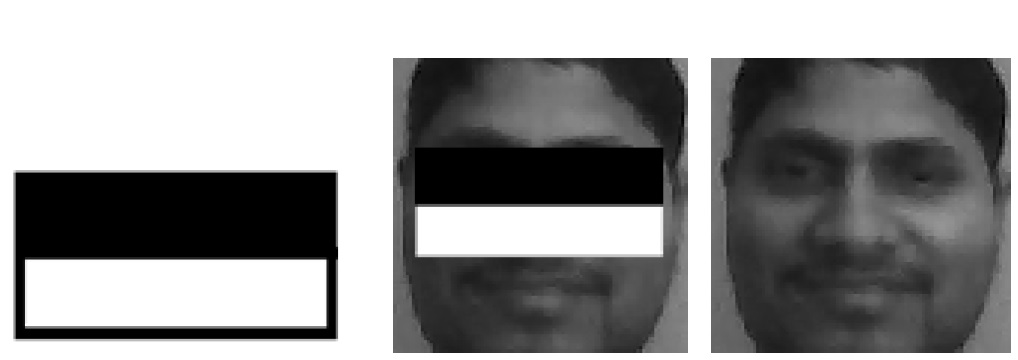

(code in Xcode project)

#### Train Your Own Cascade Classifier
1. http://coding-robin.de/2013/07/22/train-your-own-opencv-haar-classifier.html
2. https://pythonprogramming.net/haar-cascade-object-detection-python-opencv-tutorial/


## Object Tracking

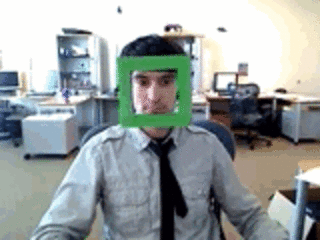

### Tracking vs Detection
1. Tracking is faster than Detection: 
When you are tracking an object that was detected in the previous frame, you know a lot about the appearance of the  object. You also know the location in the previous frame and the direction and speed of its motion. So in the next frame, you can use all this information to predict the location of the object in the next frame and do a small search around the expected location of the object to accurately locate the object. 
2. __[Tracking can help when detection fails](https://www.learnopencv.com/object-tracking-using-opencv-cpp-python/)__
3. __[Tracking preserves identity](https://www.learnopencv.com/object-tracking-using-opencv-cpp-python/)__


There are 6 different trackers available in OpenCV 3.2 — BOOSTING, MIL, KCF, TLD, MEDIANFLOW, and GOTURN

In [2]:
import cv2
import sys
 
if __name__ == '__main__' :
 
    # Set up tracker.
    # Instead of MIL, you can also use
    # BOOSTING, KCF, TLD, MEDIANFLOW or GOTURN
     
    tracker = cv2.Tracker_create("MIL")
 
    # Read video
    video = cv2.VideoCapture("videos/chaplin.mp4")
 
    # Exit if video not opened.
    if not video.isOpened():
        print("Could not open video")
        sys.exit()
 
    # Read first frame.
    ok, frame = video.read()
    if not ok:
        print("Cannot read video file")
        sys.exit()
     
    # Define an initial bounding box
    bbox = (287, 23, 86, 320)
 
    # Uncomment the line below to select a different bounding box
    # bbox = cv2.selectROI(frame, False)
 
    # Initialize tracker with first frame and bounding box
    ok = tracker.init(frame, bbox)
 
    while True:
        # Read a new frame
        ok, frame = video.read()
        if not ok:
            break
         
        # Update tracker
        ok, bbox = tracker.update(frame)
 
        # Draw bounding box
        if ok:
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (0,0,255))
 
        # Display result
        cv2.imshow("Tracking", frame)
 
        # Exit if ESC pressed
        k = cv2.waitKey(1) & 0xff
        if k == 27 : break

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-2-bc83d8eb1774>, line 17)

__[Check out different tracking APIs](http://docs.opencv.org/3.0-beta/modules/tracking/doc/tracker_algorithms.html)__

### Tracking Colored Object

__[Tracking a yellow ball](http://aishack.in/tutorials/tracking-colored-objects-opencv/)__

Actions to take:
1. Get an image from the camera
2. Figure out where the yellow ball is
3. Add the current position to an array of some sort




In [ ]:
#Convert the image into an HSV image
IplImage* imgHSV = cvCreateImage(cvGetSize(img), 8, 3);
cvCvtColor(img, imgHSV, CV_BGR2HSV);

#Create a new image that will hold the threholded image
IplImage* imgThreshed = cvCreateImage(cvGetSize(img), 8, 1);
#Threshold
cvInRangeS(imgHSV, cvScalar(20, 100, 100), cvScalar(30, 255, 255), imgThreshed);

#Return the image after thresholding
cvReleaseImage(&imgHSV);
return imgThreshed;

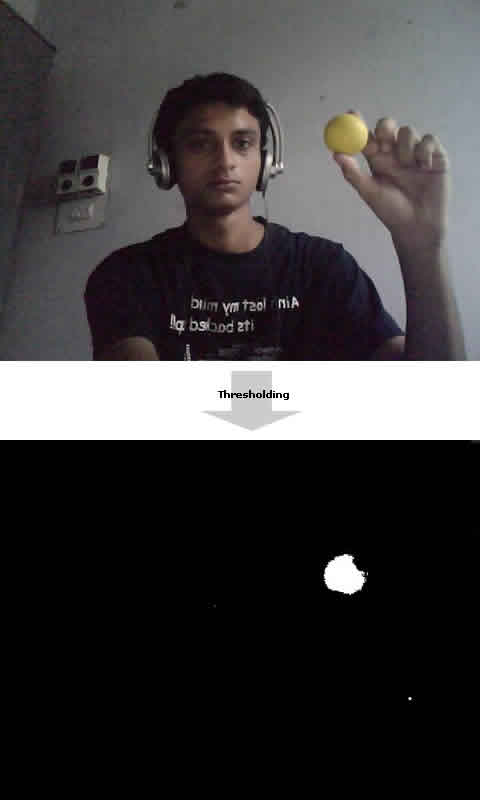

In main function:

In [ ]:
#Initialize capturing live feed from the camera
CvCapture* capture = 0;

capture = cvCaptureFromCAM(0);

#Couldn't get a device? Throw an error and quit
if(!capture){
    printf("Could not initialize capturing...");
    return -1;
}

#Setup two windows for display
cvNamedWindow("video");
cvNamedWindow("thresh");

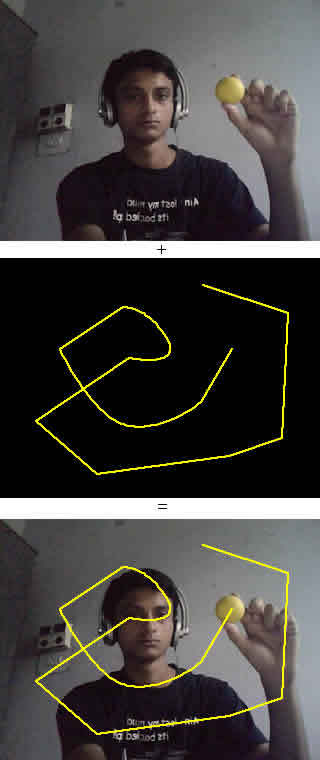

In [ ]:
#This image holds the "scribble" data...
#the tracked positions of the ball
IplImage* imgScribble = NULL;

#An infinite loop
while(true){
    #Will hold a frame captured from the camera
    IplImage* frame = 0;
    frame = cvQueryFrame(capture);
    
    #If we couldn't grab a frame... quit
    if(!frame)
        break;
    #If this is the first frame, we need to initialize it
    if(imgScribble == NULL){
        imgScribble = cvCreateImage(cvGetSize(frame), 8, 3);
    }
    
    #Holds the yellow thresholded image (yellow = white, rest = black)
    IplImage* imgYellowThresh = GetThresholdedImage(frame);
    
    #Calculate the moments to estimate the position of the ball
    CvMoments *moments = (CvMoments*)malloc(sizeof(CvMoments));

    cvMoments(imgYellowThresh, moments, 1);

    #The actual moment values
    double moment10 = cvGetSpatialMoment(moments, 1, 0);
    double moment01 = cvGetSpatialMoment(moments, 0, 1);

    double area = cvGetCentralMoment(moments, 0, 0);

In [ ]:
    #Holding the last and current ball positions
    static int posX = 0;

    static int posY = 0;

    int lastX = posX;

    int lastY = posY;
    
    #The current position of the ball
    posX = moment10/area;
    posY = moment01/area;

In [ ]:
    #We want to draw a line only if its a valid position
    if(lastX>0 && lastY>0 && posX>0 && posY>0){
        #Draw a yellow line from the previous point to the current point
        cvLine(imgScribble, cvPoint(posX, posY), cvPoint(lastX, lastY), cvScalar(0,255,255), 5);
    }
    
    #Add the scribbling image and the frame...
    cvAdd(frame, imgScribble, frame);
    cvShowImage("thresh", imgYellowThresh);
    cvShowImage("video", frame);
    
    #We're done using the camera. Other applications can now use it
    cvReleaseCapture(&capture);
    return 0;
}

Reference:

CMM Website on WaterShed Transform http://cmm.ensmp.fr/~beucher/wtshed.html

Image Segmentation with Watershed Algorithm http://docs.opencv.org/3.1.0/d3/db4/tutorial_py_watershed.html

"Object Tracking using OpenCV (C++/Python)" https://www.learnopencv.com/object-tracking-using-opencv-cpp-python/

Tracking colored objects in OpenCV http://aishack.in/tutorials/tracking-colored-objects-opencv/
